# Configuración Inicial

## Habilitar GPU (solo para Google Colab)

En la barra superior:

1.   Entorno de ejecución
2.   Cambiar tipo de entorno de ejecución -> GPU


## Subir *dataset* (solo para Google Colab)

In [4]:
from google.colab import files

uploaded = files.upload()  # Seleccionar el archivo desde el sistema local

Saving Housing.csv to Housing.csv


# 1. Procesamiento de datos

## 1.1 Carga y exploración inicial

### 1.1.1 Carga del dataset y visualización inicial

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Housing.csv")  # Asegurarse de tener el archivo en el directorio local, o subirlo manualmente a Google Colab

In [17]:
# Visualizar primeras filas
print("Primeras 5 filas:")
print(df.head())

# Verificar valores nulos
print("\nValores faltantes por columna:")
df.isnull().sum()

Primeras 5 filas:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Valores faltantes por columna:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No hay valores faltantes en ninguna columna. Por tanto, no es necesario hacer tratamiento de valores nulos.

### 1.1.2 Análisis de distribuciones y outliers

Graficar histogramas y diagramas de caja:

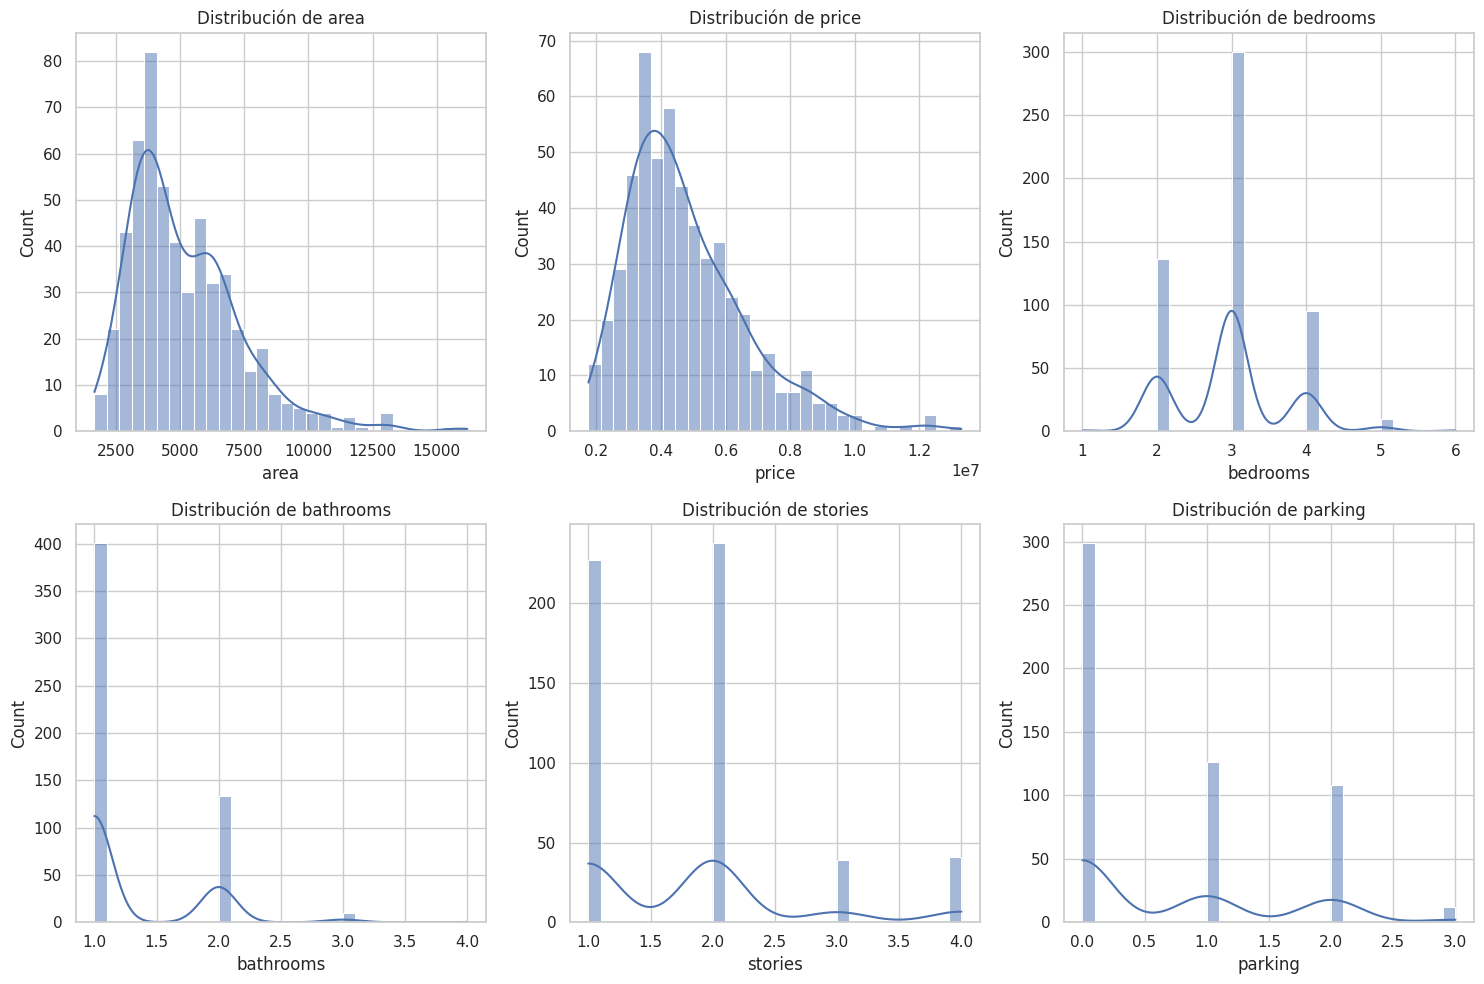

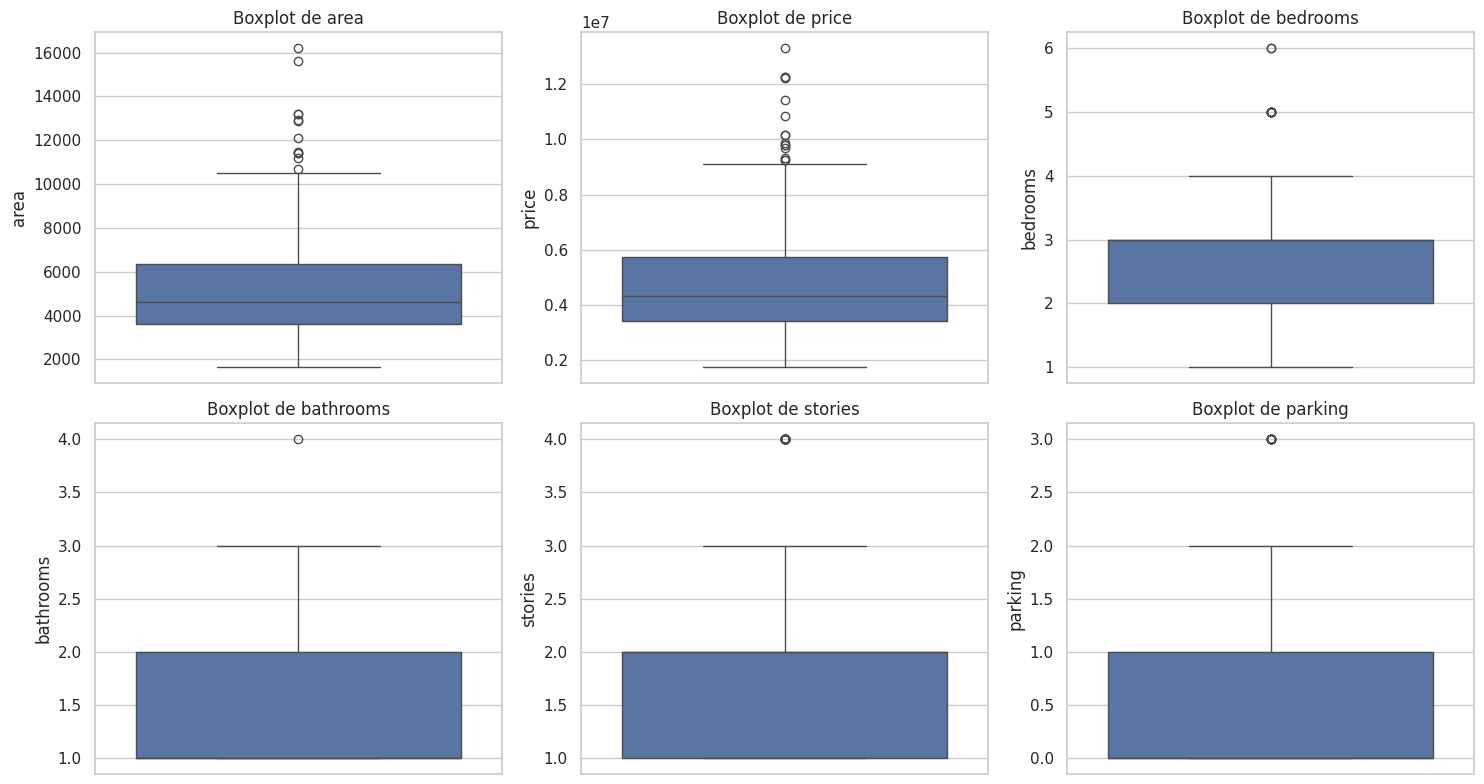

In [18]:
# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")

# Histogramas para variables numéricas
numerical_cols = ['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

- **Histogramas**:

    Muestran la distribución de cada variable numérica.

    Si la distribución tiene una cola larga a la derecha (**sesgo positivo**), significa que hay valores extremadamente altos. En este caso, sucede con `area` y `price`.

- **Boxplots**:

    Identifican valores **atípicos** (_outliers_) en cada variable.

    Los puntos fuera de los "bigotes" (líneas horizontales) son _outliers_. De nuevo, `area` y `price` tienen varios, lo que sugiere que hay propiedades con áreas mucho más grandes que el resto, y con un precio también mucho mayor a los demás.

## 1.2 Preprocesamiento de datos

### 1.2.1 Codificación de variables categóricas

- **Binarias**: `1` para "_yes_", `0` para "_no_".

- ¿Por qué es mejor One-Hot Encoding que Label Encoding en este caso?

    1. Evita jerarquías artificiales:

        La red neuronal podría interpretar erróneamente que unfurnished (0) < semi-furnished (1) < furnished (2), lo que no necesariamente refleja la realidad en los precios.

    2. Flexibilidad del modelo:

        Con One-Hot, cada categoría se trata como una característica independiente, permitiendo al modelo aprender contribuciones no lineales.

    3. Ejemplo práctico:

        Una propiedad semi-furnished no es el "punto medio" entre unfurnished y furnished en términos de precio. One-Hot captura mejor esta relación.

In [19]:
# Variables binarias (yes/no)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# One-Hot Encoding para furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnishing', dtype=int)

/tmp/ipykernel_1029/56217782.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [20]:
# Verificar cambios
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


### 1.2.2 Normalización de Variables Numéricas

`StandardScaler` centra las variables en 0 con **desviación estándar** 1. De esta forma, evita que variables como `area` (valores grandes) dominen el modelo.

In [21]:
from sklearn.preprocessing import StandardScaler

# Separar variables numéricas
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_numerical = df[numerical_cols]

# Escalado (usando StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Reemplazar columnas originales con valores escalados
df[numerical_cols] = X_scaled

In [23]:
# Verificar cambios
df[numerical_cols].head()

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692


### 1.2.3 División Train-Test

- Se separa el conjunto de datos entre características y variable objetivo (price).

- Se utiliza `train_test_split` para dividir el conjunto de datos en 80% datos de entrenamiento y 20% datos de prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('price', axis=1)  # Todas las columnas excepto 'price'
y = df['price']  # Columna 'price' como variable objetivo

# División: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Verificar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (436, 14)
Tamaño del conjunto de prueba: (109, 14)
